In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
# load different datasets
dataset = pd.read_csv("plant_village.csv")

In [3]:
dataset.head(30)

,Unnamed: 0,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy,y
0,0,10.303232,10.565696,7.202128,26.689568,29.214835,20.514741,204.492162,0.854346,0.821192,3.163098,0
1,1,39.378544,47.337776,27.920192,43.021096,51.138942,34.967757,570.381479,0.865425,0.486941,8.337872,0
2,2,26.627872,34.712400,20.448400,39.065229,50.318358,31.210937,550.702195,0.855159,0.654456,5.768557,0
3,3,27.129280,31.664864,21.621744,42.731747,49.645639,35.008290,424.735545,0.893035,0.681807,5.436425,0
4,4,81.850864,83.866048,69.002400,61.546605,62.831656,54.778033,801.629089,0.891344,0.340557,10.342285,0
5,5,28.029968,29.882816,20.723056,37.029186,40.086814,31.354820,367.360994,0.868047,0.546512,7.424251,0
6,6,68.736480,68.191312,58.581568,63.469856,62.330225,56.824233,592.272350,0.921361,0.452917,8.780192,0
7,7,31.246112,37.940160,25.005680,46.303604,53.388465,40.841137,649.740153,0.863242,0.623184,6.446867,0
8,8,31.837584,37.302416,23.058032,48.065615,57.164858,38.580045,580.836951,0.887840,0.623467,6.514698,0
9,9,28.107664,32.316640,27.510080,33.837849,35.890787,33.934779,208.113700,0.914391,0.535777,7.223941,0


In [4]:
dataset.shape

(16540, 12)

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
y = dataset['y'].values
y

array([ 0,  0,  0, ..., 37, 37, 37])

In [7]:

X = dataset.iloc[:, 1:-1]

In [8]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,10.303232,10.565696,7.202128,26.689568,29.214835,20.514741,204.492162,0.854346,0.821192,3.163098
1,39.378544,47.337776,27.920192,43.021096,51.138942,34.967757,570.381479,0.865425,0.486941,8.337872
2,26.627872,34.712400,20.448400,39.065229,50.318358,31.210937,550.702195,0.855159,0.654456,5.768557
3,27.129280,31.664864,21.621744,42.731747,49.645639,35.008290,424.735545,0.893035,0.681807,5.436425
4,81.850864,83.866048,69.002400,61.546605,62.831656,54.778033,801.629089,0.891344,0.340557,10.342285


In [9]:
X.shape

(16540, 10)

In [10]:
# Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [12]:
X_train.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
8515,66.941584,74.050576,57.079728,54.748415,57.846760,46.653992,511.043328,0.914568,0.387800,9.568841
12841,50.398656,56.705584,39.972928,45.802395,47.602207,40.136040,560.744260,0.866246,0.412673,8.994582
1115,34.169440,46.822416,30.590272,30.056743,40.067912,27.719022,440.240116,0.825751,0.431009,8.434762
9189,35.697840,49.009264,31.296704,44.705260,57.004606,42.720904,785.355929,0.849416,0.525525,7.863655
6916,40.412720,44.323328,35.230000,80.817963,90.396870,71.705922,2106.512327,0.848579,0.781642,3.820201


In [13]:
X_train.shape

(11578, 10)

In [14]:
y_train[0:5]

array([20, 29,  2, 21, 16])

In [15]:
# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
X_train[0:2]

array([[ 0.60716008,  0.4844318 ,  0.69691542,  0.38217182,  0.09275888,
         0.27585538, -0.56793325,  0.76681655, -0.58412909,  0.57932515],
       [-0.10011115, -0.19672166, -0.13117323, -0.32231769, -0.69787901,
        -0.29285769, -0.48620105,  0.19161656, -0.41063175,  0.29054983]])

In [19]:
y_train[0:2]

array([20, 29])

In [20]:
# Applying SVM classifier model

In [21]:
from sklearn import svm

In [1]:
# for GPU:
# import cuml.svm as cuml_svm
# import dask_cuml.model_selection as dcv
# from sklearn.datasets import make_classification
# from dask_cuda import LocalCUDACluster
# from dask.distributed import Client

# # Generate some sample data
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# # Setup a Dask-CUDA cluster with the T4-GPU
# cluster = LocalCUDACluster()
# client = Client(cluster)

# # Create a cuML SVM model
# clf = cuml_svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
#                    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
#                    max_iter=-1, probability=False, random_state=None, shrinking=True,
#                    tol=0.001, verbose=False)

# # Fit the model with Dask-Cuml
# clf.fit(X, y)

# # Define the parameter grid for GridSearchCV with Dask-Cuml
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# # Create GridSearchCV with Dask-Cuml model
# grid_search = dcv.GridSearchCV(clf, param_grid, cv=5)

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_clf = grid_search.best_estimator_

# print("Best Parameters with Dask-Cuml:", best_params)
# print("Best Estimator with Dask-Cuml:", best_clf)

In [22]:
clf = svm.SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
clf.fit(X_train, y_train)

SVC(C=100.0, gamma=0.01)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.554615074566707

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
best_params

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}

In [ ]:
from sklearn import metrics

# Calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43       163
           1       0.59      0.66      0.62       120
           2       0.74      0.76      0.75       129
           3       0.53      0.49      0.51       132
           4       0.34      0.33      0.34       131
           5       0.56      0.54      0.55       143
           6       0.40      0.49      0.44       141
           7       0.63      0.61      0.62       153
           8       0.53      0.48      0.50       151
           9       0.45      0.67      0.54       120
          10       0.36      0.39      0.38       146
          11       0.50      0.33      0.40         3
          12       0.95      0.92      0.93       132
          13       0.27      0.07      0.11       110
          14       0.57      0.53      0.55       148
          15       0.65      0.73      0.69       134
          16       0.46      0.64      0.54       109
          17       0.66    

In [ ]:
int(clf.predict(X_train[0:1]))

/tmp/ipykernel_23204/193658397.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(clf.predict(X_train[0:1]))


31

In [ ]:
y_train[0:1]

array([20])

In [ ]:
print(X_train.shape, y_train.shape)

(11578, 10) (11578,)


In [ ]:
clf = svm.SVC(C=best_params['C'], cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=best_params['gamma'], kernel=best_params['kernel'],
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)
clf.fit(X_train, y_train)

SVC(C=100, gamma=0.2)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6438935912938332

In [ ]:
class_names = dataset.iloc[:, -1].unique()

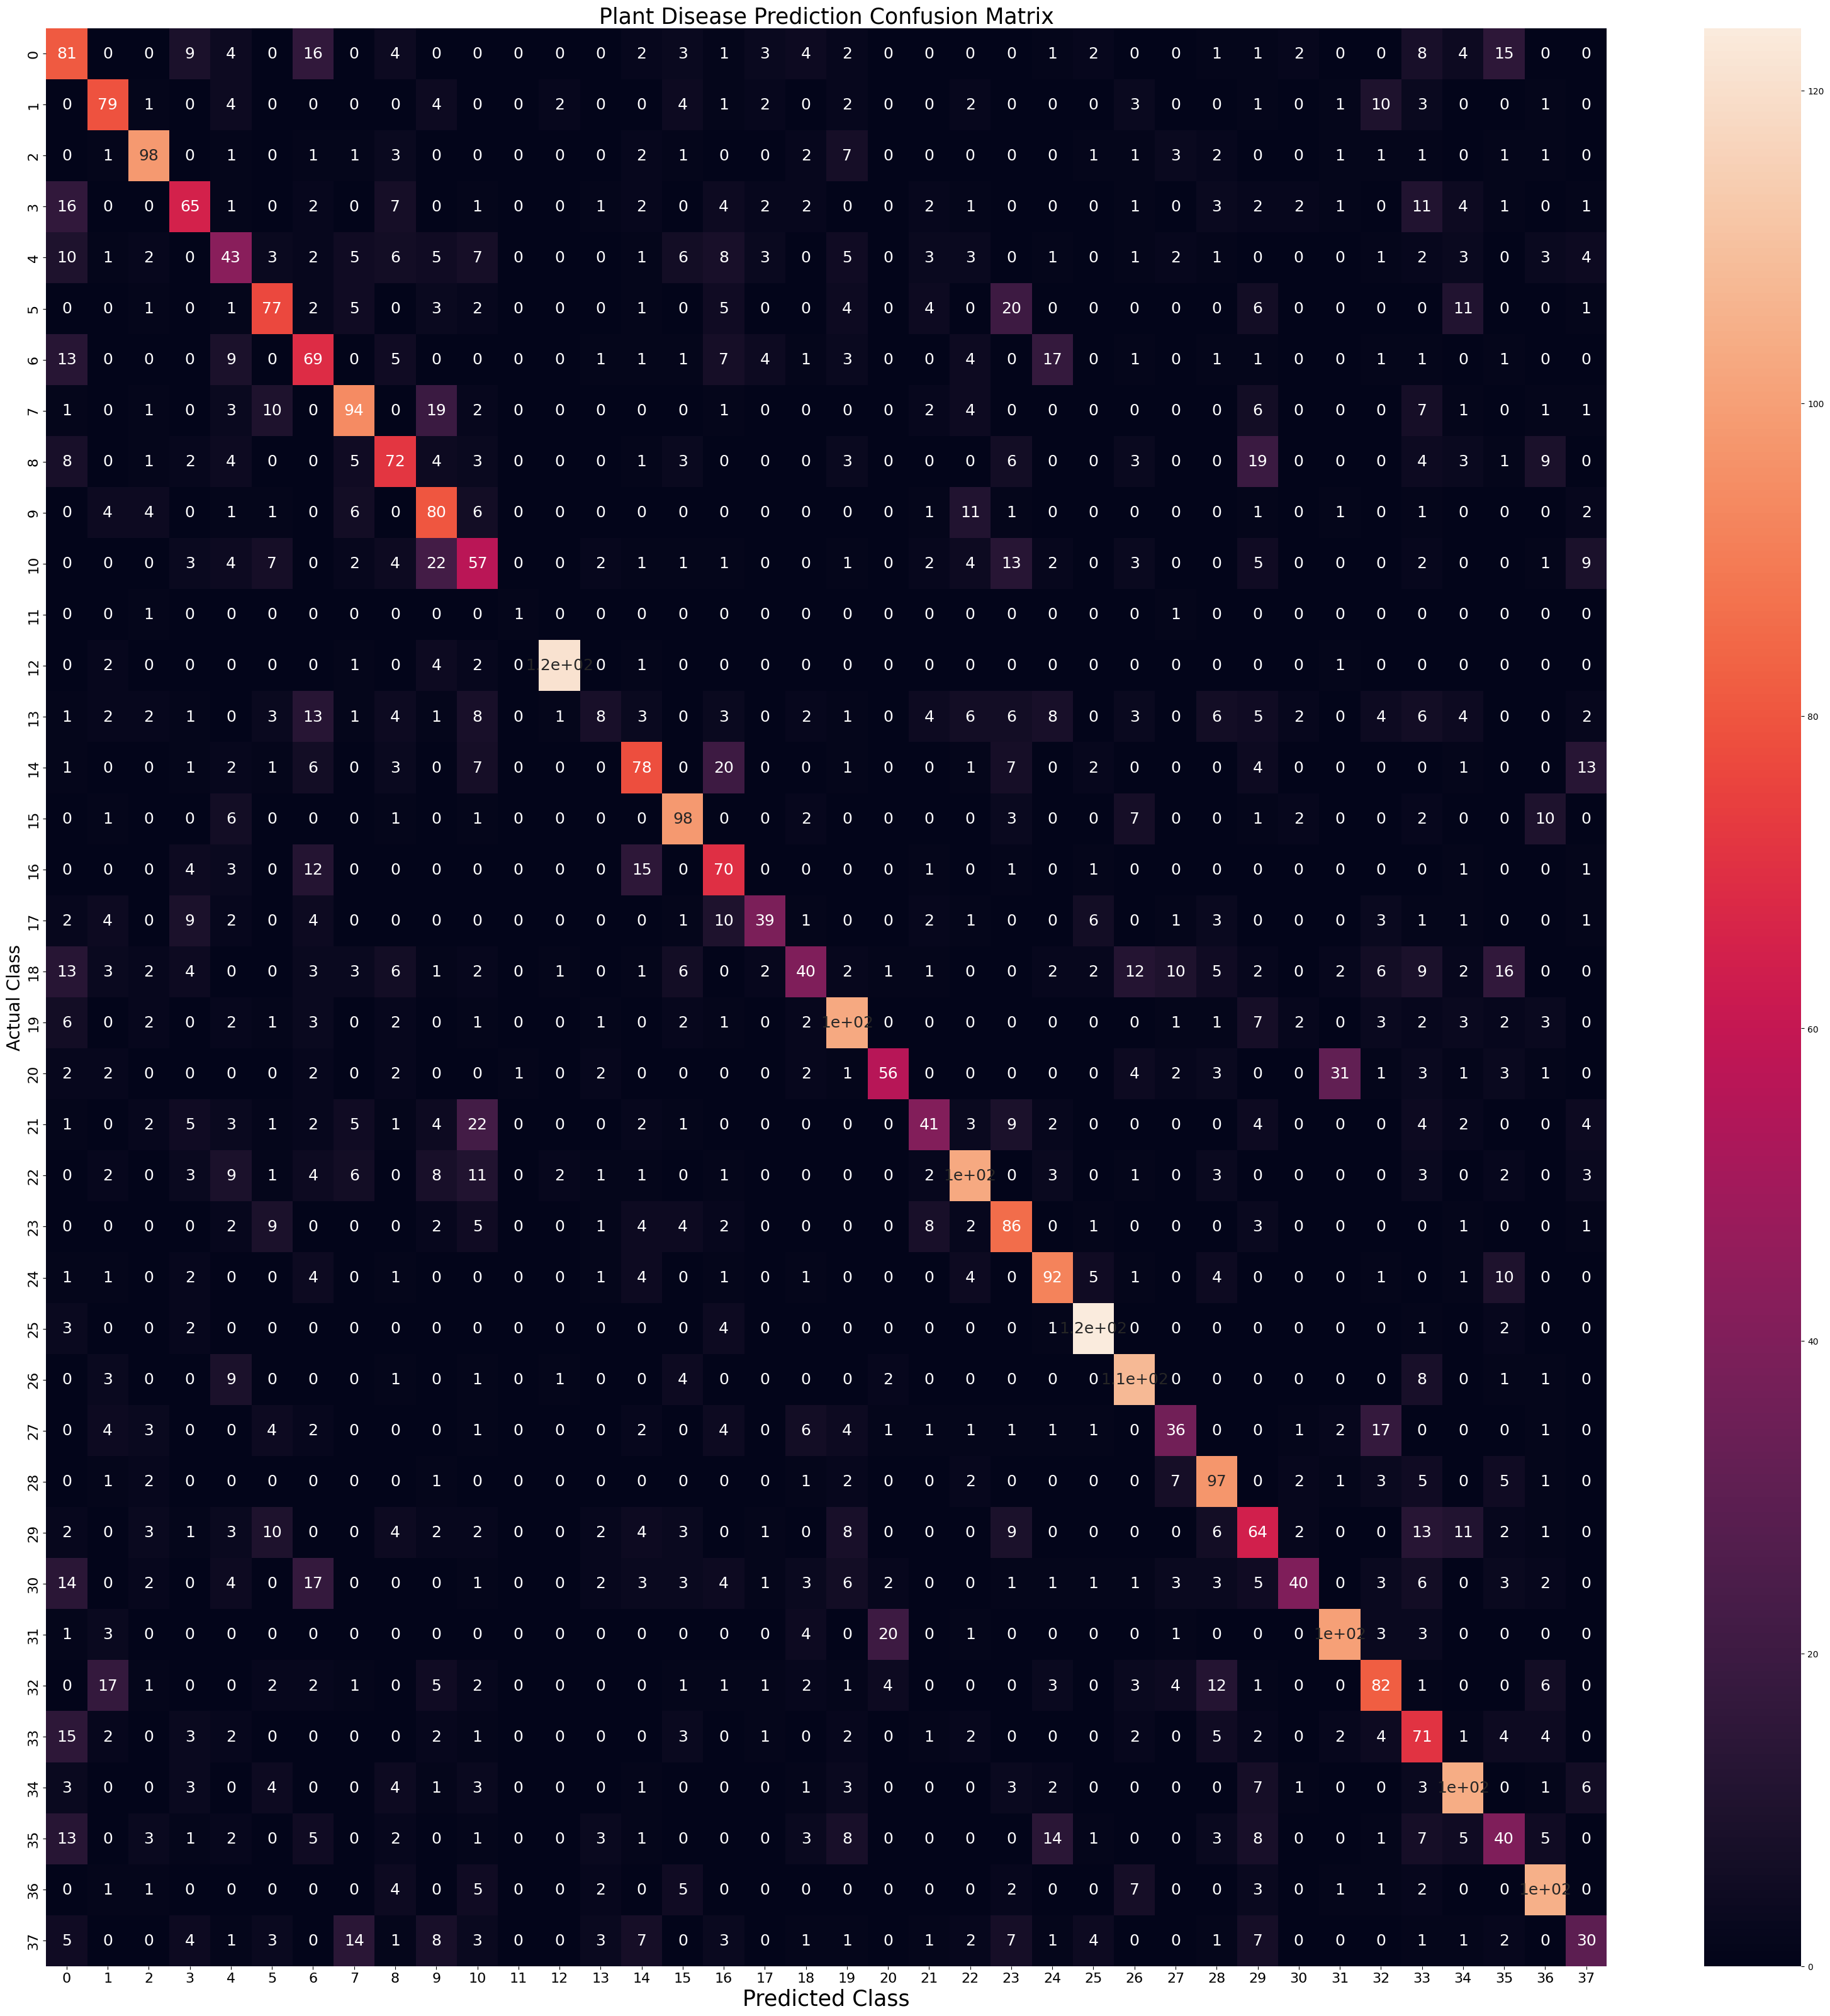

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `conf_matrix` is your confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 18},
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)

# Adjust the font size of class names (ticks)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()